# Тема 2. Разведочный (исследовательский) анализ: фильтрация, очистка данных, подготовка к дальнейшей работе 

## Исследовательский анализ данных

В этом уроке рассматриваются следующие вопросы:

1. Выбор и загрузка набора данных
2. Подготовка и очистка данных
3. Исследовательский анализ и визуализация
4. Ответы на вопросы относительно данных
5. Обобщение и выводы

### Источник данных и методы загрузки

В этом уроке мы проанализируем набор данных `опроса разработчиков StackOverflow`[https://insights.stackoverflow.com/survey]. 

Набор данных содержит ответы на ежегодный опрос, проводимый StackOverflow.

Описание:

Прилагаемый набор данных представляет собой полные очищенные результаты опроса разработчиков Stack Overflow 2022 года. Бесплатные ответы и личная информация были удалены из результатов, чтобы защитить конфиденциальность респондентов. 

Результаты опроса можно посмотреть на сайте:
https://insights.stackoverflow.com/survey

Опрос текущего (2022 г), можно получить в виде архива:
https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip


Внутри архива, помимо README есть еще три файла:
1. **Survey_results_public.csv** — CSV-файл с основными результатами опроса, по одному респонденту в строке и по одному столбцу на ответ.
2. **Survey_results_schema.csv** — CSV-файл со схемой опроса, т. е. вопросами, соответствующими каждому названию столбца.
3. **so_survey_2022.pdf** - PDF-файл инструмента обследования

Респондентов набирали в основном через каналы, принадлежащие Stack Overflow. В пятерку основных источников респондентов вошли сообщения на сайте, сообщения в блогах, списки адресов электронной почты, мета-сообщения, рекламные баннеры и сообщения в социальных сетях. Поскольку респонденты набирались таким образом, наиболее заинтересованные пользователи Stack Overflow с большей вероятностью замечали ссылки на опрос и нажимали, чтобы начать его.

Юридический аспекты:
Эта база данных — Результаты общедоступного опроса разработчиков Stack Overflow 2022 — доступна по лицензии Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/ . Любые права на отдельное содержимое базы данных лицензируются в соответствии с Лицензией на содержимое базы данных: http://opendatacommons.org/licenses/dbcl/1.0/

TLDR: можно свободно делиться, адаптировать и создавать производные работы на основе результатов опроса разработчиков The Public 2022 Stack Overflow, если  указывать Stack Overflow, сохраняеть базу данных открытой (если мы распространяем ее).

Есть несколько вариантов загрузки набора данных для наших целей:

- Загрузка CSV вручную или загрузка его через графический интерфейс Jupyter.

- Использование функции **urllib.request** для загрузки CSV-файлов с URL-адреса.

- Использование функций Pandas по работе с файлами CSV. В предыдущих уроках мы уже рассмотрели все эти операции.

Мы будем использовать  функции библиотеки Pandas, но так как база распространяется в zip-архиве, нам нужно сделать несколько дополнительных манипуляций по извлечению CSV файла.

In [ ]:
import io
import zipfile
import requests  # $ pip install requests

In [ ]:
response = requests.get("https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip")

In [ ]:
with response, zipfile.ZipFile(io.BytesIO(response.content)) as archive:
    archive.extractall('Stack-overflow-2022')

Набор данных содержит три файла, которые нам понадобятся:

- **README_2022.txt** - информация о наборе данных
- **survey_results_schema.csv** - список вопросов и короткие коды для каждого вопроса
- **survey_results_public.csv** - полный список ответов на вопросы

Давайте загрузим файлы CSV, используя библиотеку Pandas. Мы будем использовать имя  фрейма данных `survey_raw_df`, чтобы указать, что это необработанные данные, которые мы можем очищать, фильтровать и изменять и, таким образом, подготовить фрейм данных к анализу.

In [ ]:
import pandas as pd

In [ ]:
survey_raw_df = pd.read_csv('Stack-overflow-2022/survey_results_public.csv')

In [ ]:
survey_raw_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


Набор данных содержит более 73 000 ответов на 60 вопросов (хотя многие вопросы являются необязательными). Ответы были анонимизированы, чтобы удалить личную информацию, и каждому респонденту был присвоен рандомизированный идентификатор респондента.

Давайте просмотрим список столбцов во фрейме данных.

In [ ]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

Похоже, что короткие коды для вопросов использовались в качестве имен столбцов.

Мы можем обратиться к файлу схемы, чтобы увидеть полный текст каждого вопроса. Файл схемы содержит только два важных для нас столбца: `qname` и `question`. Мы можем загрузить его как `серию Pandas` с  `индексом qname` и `значением question`.

In [ ]:
schema_fname = 'Stack-overflow-2022/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='qname').question

In [ ]:
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

schema_raw

Теперь мы можем использовать `schema_raw` для получения полного текста вопроса для любого столбца в `survey_raw_df`.

In [ ]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Мы загрузили набор данных и готовы перейти к следующему этапу предварительной обработки и очистки данных для анализа.

### Подготовка и очистка данных

Хотя ответы на опрос содержат большое количество информации, мы ограничим наш анализ следующими областями:

- Демографические данные респондентов опроса и мирового сообщества программистов
- Распределение навыков программирования, опыта и предпочтений
- Информация о трудоустройстве, предпочтениях и мнениях

Давайте выберем подмножество столбцов с соответствующими данными для нашего анализа.

In [ ]:
selected_columns = [
    # Демография
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'Ethnicity',
    'Accessibility',
    'MentalHealth',
    # Опыт программирования
    'LearnCode',
    'LearnCodeOnline',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    # Трудоустройство
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'DevType',
    'OrgSize',
    'CompTotal',
    'Currency'
]

In [ ]:
len(selected_columns)

20

In [ ]:
schema_raw.Age

'What is your age?'

In [ ]:
top_age=survey_raw_df.Age.value_counts().head(15)

top_age

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

Давайте извлечем копию данных из этих столбцов в новый фрейм данных `survey_df`. Мы можем продолжать вносить изменения, не затрагивая исходный фрейм данных.

In [ ]:
survey_df = survey_raw_df[selected_columns].copy()

In [ ]:
schema = survey_df.reindex(columns = selected_columns)

Давайте рассмотрим некоторую основную информацию о фрейме данных.

In [ ]:
survey_df.shape

(73268, 20)

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   Ethnicity               69474 non-null  object 
 5   Accessibility           67244 non-null  object 
 6   MentalHealth            66447 non-null  object 
 7   LearnCode               71580 non-null  object 
 8   LearnCodeOnline         50685 non-null  object 
 9   YearsCode               71331 non-null  object 
 10  YearsCodePro            51833 non-null  object 
 11  LanguageHaveWorkedWith  70975 non-null  object 
 12  LanguageWantToWorkWith  67027 non-null  object 
 13  Employment              71709 non-null  object 
 14  RemoteWork              58958 non-null

In [ ]:
survey_df['Age'].value_counts()

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

Большинство столбцов имеют тип данных object, потому что они содержат значения разных типов или содержат **пустые значения (NaN)**. 

Похоже, что каждый столбец содержит несколько пустых значений, так как **число Non-Null** для каждого столбца меньше, чем общее количество строк (64461). 

Нам нужно иметь дело с пустыми значениями и вручную настраивать тип данных для каждого столбца в каждом конкретном случае.

Только один столбец был обнаружен как числовой столбец (CompTotal), хотя несколько других столбцов содержат также числовые значения. 

Чтобы упростить анализ, давайте преобразуем некоторые другие столбцы в числовые типы данных, игнорируя любые нечисловые значения. Нечисловые преобразуются в NaN.

Столбец «Gender» также позволяет выбрать несколько вариантов, но мы удалим значения, содержащие гендеры, кроме `Man` и `Woman`. Чтобы не возится с европейской чушью.

In [ ]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [ ]:
import numpy as np

In [ ]:
gender_list = ['Man','Woman']

In [ ]:
survey_df.drop(survey_df.loc[~survey_df['Gender'].isin(gender_list)].index, inplace=True)

In [ ]:
survey_df['Gender'].value_counts()

Man      64607
Woman     3399
Name: Gender, dtype: int64

Было тяжело, но мы зачистили весь мусор!!!

Давайте проведем еще несколько магипуляций для очистки выбросов по зарплате.

In [ ]:
survey_df.dropna(inplace=True)

In [ ]:
survey_df.CompTotal.describe()

count     17223.000000
mean      57046.689949
std       45454.915127
min           0.000000
25%       11600.000000
50%       50000.000000
75%       90000.000000
max      155000.000000
Name: CompTotal, dtype: float64

In [ ]:
survey_df.drop(survey_df[survey_df.CompTotal > 90000].index, inplace=True)

In [ ]:
survey_df

,Country,Age,Gender,EdLevel,Ethnicity,Accessibility,MentalHealth,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,Employment,RemoteWork,CodingActivities,DevType,OrgSize,CompTotal,Currency
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White,None of the above,"I have a mood or emotional disorder (e.g., dep...",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Data scientist or machine learning specialist;...,20 to 99 employees,32000.0,GBP\tPound sterling
10,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",European,None of the above,None of the above,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,5,2,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,C#;Go;JavaScript,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Developer, full-stack;Developer, back-end",100 to 499 employees,48000.0,GBP\tPound sterling
16,Czech Republic,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",European,None of the above,"I have a mood or emotional disorder (e.g., dep...",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,7,4,C#;Java;PHP;Python;R,JavaScript;Kotlin;PowerShell;SQL;TypeScript;VBA,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Developer, full-stack",2 to 9 employees,37000.0,CZK\tCzech koruna
25,Germany,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White;European,None of the above,None of the above,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,16,9,Dart;Go;Java;Kotlin;Swift;TypeScript,C#;Dart;Java;Kotlin;Swift;TypeScript,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Developer, back-end;Developer, mobile",20 to 99 employees,85000.0,EUR European Euro
34,Poland,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",European,None of the above,None of the above,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs,6,5,HTML/CSS;JavaScript;Python;SQL;TypeScript,HTML/CSS;JavaScript;Python;SQL,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Boots...,"Developer, back-end",100 to 499 employees,30000.0,PLN\tPolish zloty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73233,Russian Federation,25-34 years old,Man,Some college/university study without earning ...,White;European,None of the above,None of the above,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,10,3,C#;F#;JavaScript,F#;JavaScript;Kotlin,"Employed, full-time",Fully remote,Hobby,"Developer, full-stack",20 to 99 employees,80000.0,RUB\tRussian ruble
73251,France,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",European,None of the above,None of the above,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,12,8,Java;JavaScript;Python;Ruby;Scala;Swift;TypeSc...,Haskell;Kotlin;Python;Scala;Swift;TypeScript,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Developer, full-stack",20 to 99 employees,65000.0,EUR European Euro
73259,Poland,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White;European,None of the above,None of the above,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,6,2,Elixir,Elixir,"Employed, full-time","Hybrid (some remote, some in-person)",Other (please specify):,"Developer, back-e

Теперь мы очистили и подготовили набор данных для анализа. Давайте взглянем на образец строк из фрейма данных.

In [ ]:
survey_df['CompTotal'] = pd.to_numeric(survey_df.CompTotal, errors='coerce')

Давайте теперь просмотрим некоторые основные статистические данные для числового столбца.

In [ ]:
survey_df.describe()

,CompTotal
count,12954.000000
mean,35888.630076
std,28689.277692
min,0.000000
25%,5943.250000
50%,35000.000000
75%,60000.000000
max,90000.000000


### Исследовательский анализ и визуализация

Прежде чем мы сформируем вопросы к этому опросу, было бы полезно понять демографические данные респондентов, т.е. страну, возраст, пол, уровень образования, уровень занятости и т.д. Очень важно изучить эти переменные, чтобы понять, насколько репрезентативным является опрос. Обследование такого масштаба обычно имеет некоторую предвзятость при отборе.

Начнем с импорта `matplotlib.pyplot` и `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Страна

Давайте посмотрим на количество стран, из которых есть ответы на опрос, и нанесем на график десять стран с наибольшим количеством ответов.

In [ ]:
schema.Country

0                                                      NaN
1                                                   Canada
2        United Kingdom of Great Britain and Northern I...
3                                                   Israel
4                                 United States of America
                               ...                        
73263                                              Nigeria
73264                             United States of America
73265                             United States of America
73266    United Kingdom of Great Britain and Northern I...
73267                                               Canada
Name: Country, Length: 73268, dtype: object

In [ ]:
survey_df.Country.nunique()

146

Используя метод value_counts, мы можем определить страны с наибольшим количеством респондентов.

In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Germany                                                 1537
United Kingdom of Great Britain and Northern Ireland    1210
United States of America                                1063
France                                                   738
Brazil                                                   659
Poland                                                   574
Spain                                                    527
Netherlands                                              481
Italy                                                    446
India                                                    316
Sweden                                                   295
Canada                                                   268
Turkey                                                   249
Austria                                                  203
Israel                                                   196
Name: Country, dtype: int64

Мы можем визуализировать эту информацию с помощью гистограммы.

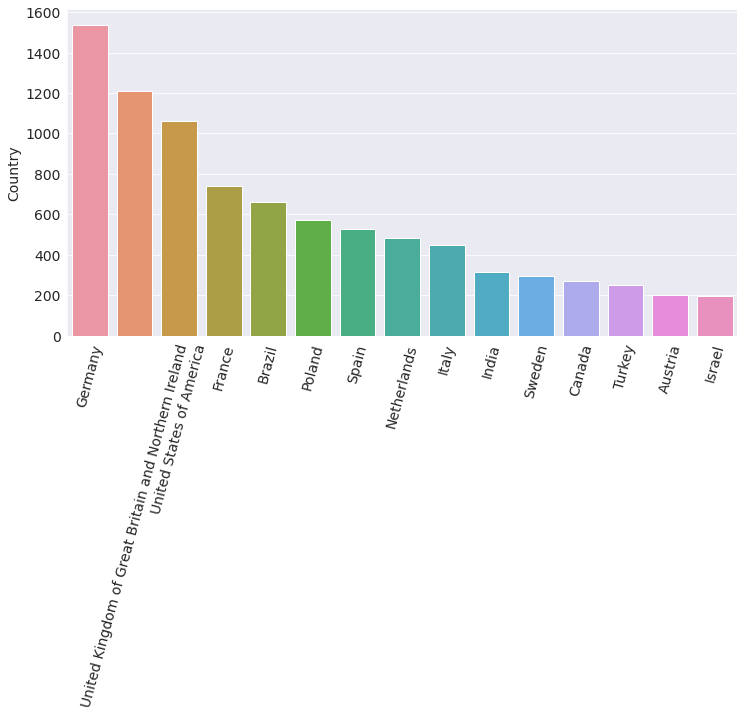

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries);

Похоже, что непропорционально большое количество респондентов из Германии, великобритании и США, вероятно, потому, что опрос проводится на английском языке, а в этих странах больше всего англоязычного населения. 

Мы уже видим, что опрос может быть нерепрезентативным для мирового сообщества программистов, особенно из неанглоязычных стран. Программисты из неанглоязычных стран почти наверняка недопредставлены.

#### Пол

Давайте посмотрим на распределение ответов по полу. Общеизвестно, что женщины недостаточно представлены в сообществе программистов, поэтому мы можем ожидать здесь неравномерного распределения.

In [ ]:
schema.Gender

0        NaN
1        NaN
2        Man
3        Man
4        NaN
        ... 
73263    Man
73264    Man
73265    Man
73266    Man
73267    Man
Name: Gender, Length: 73268, dtype: object

In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man      12365
Woman      589
Name: Gender, dtype: int64

Круговая диаграмма была бы отличным способом визуализировать распределение.

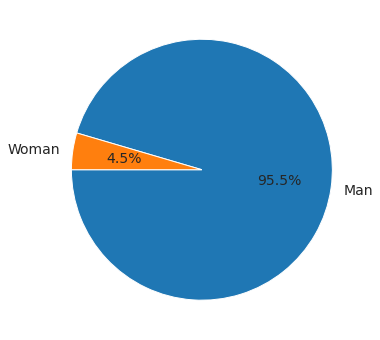

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

#### Уровень образования

Формальное образование в области компьютерных наук часто считается важным требованием для того, чтобы стать программистом. Тем не менее, в интернете доступно множество бесплатных ресурсов и учебных пособий для изучения программирования. Давайте сравним уровень образования респондентов, чтобы получить некоторое представление об этом. Здесь мы будем использовать график с горизонтальной полосой.

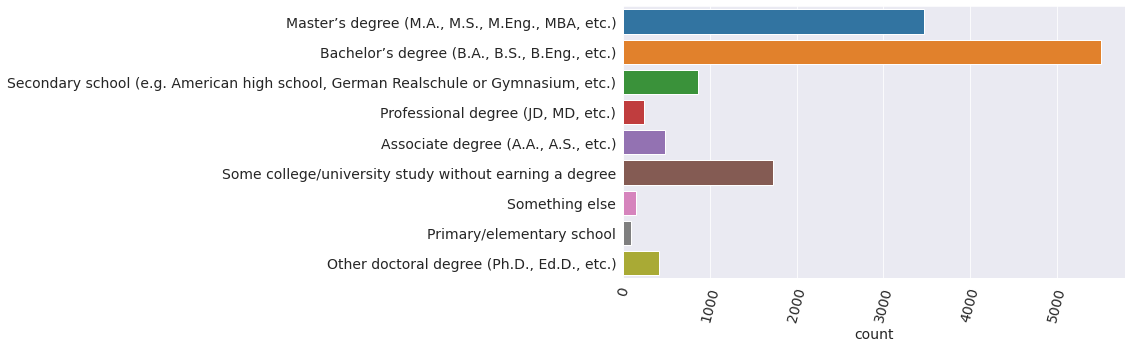

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.ylabel(None);

Похоже, что более половины респондентов имеют степень бакалавра или магистра, поэтому большинство программистов, похоже, имеют высшее образование. Однако из одного только этого графика неясно, имеют ли они степень в области компьютерных наук.

#### Трудоустройство

Фриланс или работа по контракту — распространенный выбор среди программистов, поэтому было бы интересно сравнить разбивку на полный рабочий день, неполный рабочий день и внештатную работу. Давайте визуализируем данные из столбца `Employment`.

In [ ]:
schema.Employment

0                                                      NaN
1                                      Employed, full-time
2                                      Employed, full-time
3                                      Employed, full-time
4                                      Employed, full-time
                               ...                        
73263                                  Employed, full-time
73264                                  Employed, full-time
73265                                  Employed, full-time
73266                                  Employed, full-time
73267    Independent contractor, freelancer, or self-em...
Name: Employment, Length: 73268, dtype: object

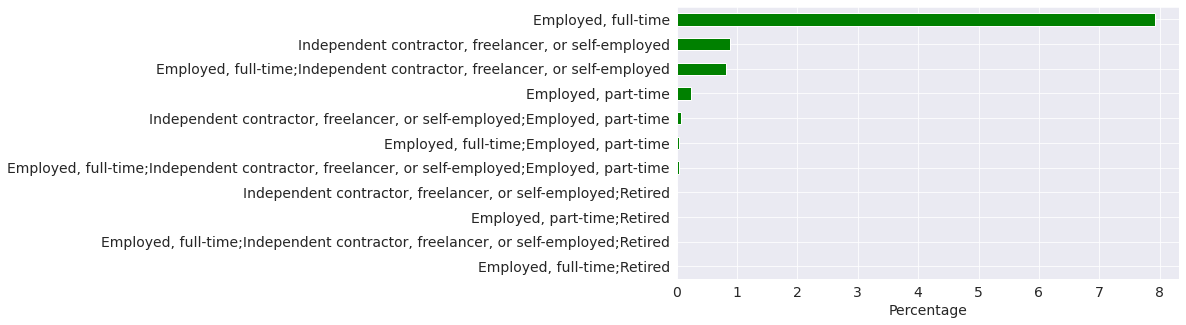

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*10).plot(kind='barh', color='g')
plt.xlabel('Percentage');

Похоже, что около 10% респондентов работают неполный рабочий день или в качестве фрилансеров.

Поле `DevType` содержит информацию о ролях, которые занимают респонденты. Поскольку вопрос допускает несколько ответов, столбец содержит списки значений, разделенных точкой с запятой ;, что немного усложняет непосредственный анализ.

In [ ]:
schema.DevType

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [ ]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                               1644
Developer, back-end                                                                                                                                                                                                                                                 1132
Developer, front-end                                                                                                                                                                                                                                                 630
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                               

Давайте определим вспомогательную функцию, которая превращает столбец, содержащий списки значений (например, survey_df.DevType), во фрейм данных с одним столбцом для каждого возможного параметра.

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [ ]:
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, mobile",Student,"Developer, embedded applications or devices",Engineering manager,...,DevOps specialist,"Developer, desktop or enterprise applications",Other (please specify):,Data or business analyst,Academic researcher,Scientist,Security professional,Educator,Blockchain,Marketing or sales professional
2,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73233,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73251,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73259,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73261,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


В dev_type_df есть по одному столбцу для каждого варианта, который можно выбрать в качестве ответа. Если респондент выбрал вариант, значение в соответствующем столбце равно True. В противном случае это - False.

Теперь мы можем использовать итоги по столбцам, чтобы определить наиболее распространенные роли.

In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            6748
Developer, back-end                              6069
Developer, front-end                             3969
Developer, desktop or enterprise applications    2175
Developer, mobile                                1768
DevOps specialist                                1492
System administrator                             1174
Database administrator                           1170
Cloud infrastructure engineer                    1131
Project manager                                   877
Developer, embedded applications or devices       870
Designer                                          761
Developer, QA or test                             737
Engineer, data                                    729
Data or business analyst                          692
Data scientist or machine learning specialist     637
Engineering manager                               563
Product manager                                   492
Academic researcher         

Как и следовало ожидать, наиболее распространенные роли включают в себя «Разработчик» ("Developer").

Мы уже получили несколько сведений о респондентах и ​​сообществе программистов, изучив отдельные столбцы набора данных. Давайте зададим несколько конкретных вопросов и попробуем ответить на них, используя операции с фреймами данных и визуализации.

##### **Какие языки программирования самые популярные в 2022 году?**

Чтобы ответить на это, мы можем использовать  столбец `LanguageHaveWorkedWith`. Как и в случае с `DevType`, здесь респондентам было разрешено выбрать несколько вариантов ответа.

In [ ]:
survey_df.LanguageHaveWorkedWith

2                        C#;C++;HTML/CSS;JavaScript;Python
10        Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL
16                                    C#;Java;PHP;Python;R
25                    Dart;Go;Java;Kotlin;Swift;TypeScript
34               HTML/CSS;JavaScript;Python;SQL;TypeScript
                               ...                        
73233                                     C#;F#;JavaScript
73251    Java;JavaScript;Python;Ruby;Scala;Swift;TypeSc...
73259                                               Elixir
73261    Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
Name: LanguageHaveWorkedWith, Length: 12954, dtype: object

Во-первых, мы разделим этот столбец на фрейм данных, содержащий столбец каждого языка, указанного в параметрах.



In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [ ]:
languages_worked_df

,C#,C++,HTML/CSS,JavaScript,Python,Bash/Shell,PowerShell,SQL,Java,PHP,...,Elixir,COBOL,Solidity,Erlang,LISP,OCaml,APL,Fortran,Julia,SAS
2,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
16,True,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
34,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73233,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73251,False,False,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
73259,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
73261,False,False,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


Похоже, что в общей сложности было включено 42 языка. Давайте объединим их, чтобы определить процент респондентов, выбравших каждый язык.

In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript     69.631002
HTML/CSS       58.622819
SQL            53.813494
Python         41.523854
TypeScript     41.469816
Bash/Shell     30.199166
C#             29.473522
Java           29.041223
PHP            24.015748
C++            16.157172
PowerShell     12.768257
C              12.505790
Go             10.020071
Kotlin          9.580052
Rust            7.835418
Dart            6.330091
Ruby            6.206577
VBA             4.940559
Swift           4.824765
R               4.021924
Groovy          3.844372
Assembly        3.095569
Lua             2.995214
MATLAB          2.964335
Delphi          2.817662
Scala           2.339046
Objective-C     2.315887
Elixir          2.292728
Perl            1.713756
Clojure         1.266018
Haskell         1.235140
Solidity        1.235140
Julia           1.096187
F#              0.957233
LISP            0.810560
Erlang          0.702486
Fortran         0.640729
SAS             0.470897
COBOL           0.455458
Crystal         0.370542


Мы можем представить эту информацию с помощью горизонтальной гистограммы.

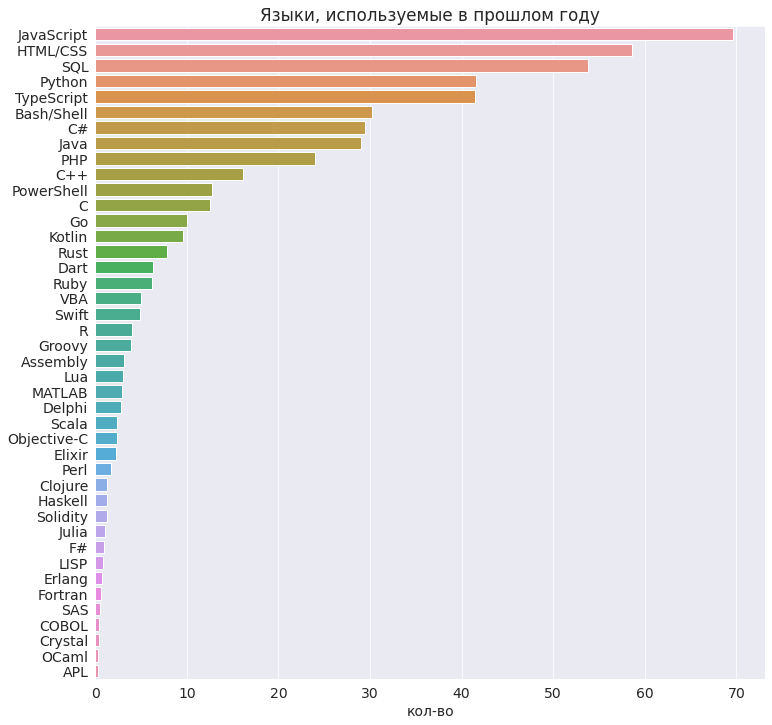

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Языки, используемые в прошлом году");
plt.xlabel('кол-во');

Возможно, неудивительно, что Javascript и HTML/CSS выходят на первое место, поскольку веб-разработка является одним из самых востребованных навыков на сегодняшний день. Кроме того, это один из самых простых способов начать работу. 

SQL необходим для работы с реляционными базами данных, поэтому неудивительно, что большинство программистов регулярно работают с SQL. 

Python, кажется, является популярным выбором для других форм разработки, опережая Java, которая была отраслевым стандартом для разработки серверов и приложений более двух десятилетий.

#### **Какие языки хотели бы изучить люди дополнительно?**

Для этого мы можем использовать столбец `LanguageDesireNextYear` с аналогичной обработкой, как и в предыдущем случае.

In [ ]:
languages_interested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

JavaScript     49.459626
TypeScript     44.982245
HTML/CSS       41.338583
Python         40.103443
SQL            40.018527
C#             24.880346
Rust           24.455767
Go             22.780608
Bash/Shell     19.862591
Java           16.983171
Kotlin         14.150069
C++            13.053883
PHP            12.714220
Dart            8.900726
C               7.866296
PowerShell      7.449436
Swift           7.256446
Ruby            5.388297
Elixir          5.125830
Scala           3.628223
R               3.612784
Solidity        3.589625
Haskell         3.442952
F#              2.910298
Clojure         2.740466
Lua             2.701868
Julia           2.678709
Assembly        2.508878
Delphi          1.783233
Erlang          1.690597
Groovy          1.628841
LISP            1.173383
VBA             1.142504
Objective-C     1.018990
Perl            0.934074
MATLAB          0.779682
OCaml           0.633009
Crystal         0.532654
SAS             0.308785
COBOL           0.285626


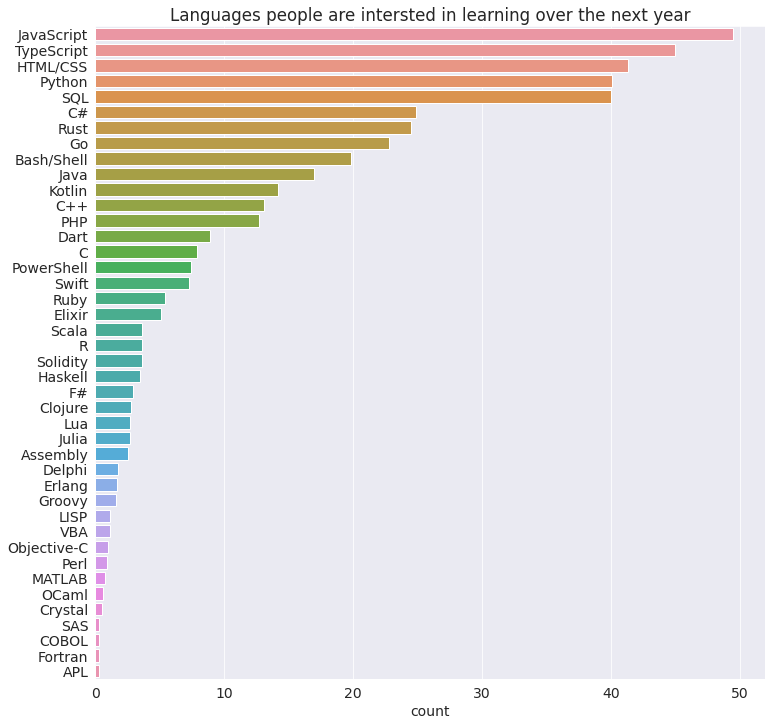

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Языки, которые люди хотят изучать в следующем году");
plt.xlabel('кол-во');

Опять же, неудивительно, что Python — это язык, который интересует большинство людей, поскольку это простой в освоении язык программирования общего назначения, хорошо подходящий для различных областей: разработка приложений, численные вычисления, анализ данных, машиностроение обучение, большие данные, облачная автоматизация, просмотр веб-страниц, создание сценариев и т.д. 

#### **Какие языки самые любимые, т.е. высокий процент людей, использовавших этот язык, хотят продолжить его изучение и использование?**

Хотя на первый взгляд этот вопрос может показаться сложным, его легко решить с помощью операций с массивами Pandas. Вот что мы можем сделать:

- Создадим новый фрейм данных `languages_loved_df`, который содержит  значение True для языка, только если соответствующие значения в `languages_worked_df` и `languages_interested_df` оба имеют значение True
- Возьмем сумму по столбцам `languages_loved_df` и разделим ее на сумму по столбцам, `languages_worked_df` чтобы получить процент респондентов, которые «любят» язык.
- Отсортируем результаты в порядке убывания и построим горизонтальную гистограмму.

In [ ]:
languages_loved_df = languages_worked_df & languages_interested_df

In [ ]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)


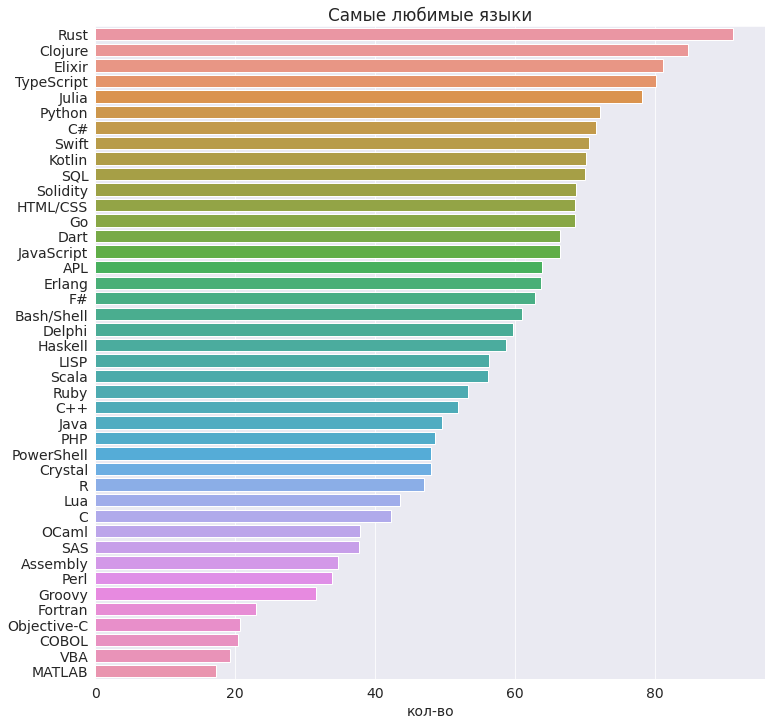

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Самые любимые языки");
plt.xlabel('кол-во');

`Rust` четыре года подряд был самым любимым языком `StackOverflow`. Второй по популярности язык — `TypeScript`, популярная альтернатива `JavaScript` для веб-разработки.

`Python` занимает третье место, несмотря на то, что он уже является одним из самых широко используемых языков в мире. Python имеет прочную основу, прост в изучении и использовании, имеет большую экосистему предметно-ориентированных библиотек и огромное всемирное сообщество.